In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a70ee93bdb27cfe4d95333040f6a202a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | calamar
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | korla
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | craig
Processing Record 11 of Set 1 | rio gallegos
Processing Record 12 of Set 1 | agva
City not found. Skipping...
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | beyneu
Processing Record 16 of Set 1 | pout
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bereda
Processing Record 2

City not found. Skipping...
Processing Record 34 of Set 4 | butere
Processing Record 35 of Set 4 | port elizabeth
Processing Record 36 of Set 4 | bambous virieux
Processing Record 37 of Set 4 | itarema
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | argir
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | biltine
Processing Record 42 of Set 4 | dicabisagan
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | ozgon
City not found. Skipping...
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | nepalganj
City not found. Skipping...
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | tiznit
Processing Record 50 of Set 4 | mitsamiouli
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | barth
Processing Record 3 of Set 5 | ijaki
City not found. Skipping...
Processing Record 4 of Set 5 | hirara
Processing Record 5 of Set 5 | phalaborw

Processing Record 25 of Set 8 | acarau
Processing Record 26 of Set 8 | moyale
Processing Record 27 of Set 8 | alugan
Processing Record 28 of Set 8 | piacabucu
Processing Record 29 of Set 8 | churapcha
Processing Record 30 of Set 8 | batticaloa
Processing Record 31 of Set 8 | huarmey
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | mwingi
Processing Record 34 of Set 8 | bilibino
Processing Record 35 of Set 8 | rivera
Processing Record 36 of Set 8 | tezu
Processing Record 37 of Set 8 | abnub
Processing Record 38 of Set 8 | charlestown
Processing Record 39 of Set 8 | cururupu
Processing Record 40 of Set 8 | mehamn
Processing Record 41 of Set 8 | seredka
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | bandar-e lengeh
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | tres arroyos
Processing Record 46 of Set 8 | cairo
Processing Record 47 of Set 8 | ilulissat
Processing Record 48 of Set 8 | meulaboh
Processing Record 49 of Set 

Processing Record 14 of Set 12 | bathsheba
Processing Record 15 of Set 12 | araouane
Processing Record 16 of Set 12 | tecoanapa
Processing Record 17 of Set 12 | linqing
Processing Record 18 of Set 12 | paamiut
Processing Record 19 of Set 12 | tshane
Processing Record 20 of Set 12 | debre tabor
Processing Record 21 of Set 12 | vokhma
Processing Record 22 of Set 12 | oktyabrskoye
Processing Record 23 of Set 12 | tornio
Processing Record 24 of Set 12 | saint-joseph
Processing Record 25 of Set 12 | san quintin
Processing Record 26 of Set 12 | lander
Processing Record 27 of Set 12 | ligayan
Processing Record 28 of Set 12 | zapresic
Processing Record 29 of Set 12 | sao mateus
Processing Record 30 of Set 12 | chukhloma
Processing Record 31 of Set 12 | kurilsk
Processing Record 32 of Set 12 | tilichiki
Processing Record 33 of Set 12 | koungou
Processing Record 34 of Set 12 | san luis
Processing Record 35 of Set 12 | nanpiao
Processing Record 36 of Set 12 | sao felix do xingu
Processing Record 

In [10]:
# Print the city count to confirm sufficient count.
len(cities)

599

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,78.78,79,100,13.71,PF,2020-02-17 21:15:24
1,Yellowknife,62.46,-114.35,-13.00,61,5,10.29,CA,2020-02-17 21:12:44
2,Calamar,10.25,-74.91,89.60,59,90,14.99,CO,2020-02-17 21:15:24
3,Katsuura,35.13,140.30,44.01,65,20,5.82,JP,2020-02-17 21:15:24
4,Korla,41.76,86.15,26.01,88,72,3.67,CN,2020-02-17 21:15:25
...,...,...,...,...,...,...,...,...,...
542,Saint-Pierre,-21.34,55.48,77.00,88,75,14.99,RE,2020-02-17 21:17:32
543,Lucea,18.45,-78.17,84.99,74,20,23.04,JM,2020-02-17 21:17:32
544,Usinsk,65.99,57.53,26.80,93,100,34.23,RU,2020-02-17 21:17:32
545,Hailar,49.20,119.70,-0.47,97,82,7.43,CN,2020-02-17 21:17:32


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-02-17 21:15:24,-23.12,-134.97,78.78,79,100,13.71
1,Yellowknife,CA,2020-02-17 21:12:44,62.46,-114.35,-13.00,61,5,10.29
2,Calamar,CO,2020-02-17 21:15:24,10.25,-74.91,89.60,59,90,14.99
3,Katsuura,JP,2020-02-17 21:15:24,35.13,140.30,44.01,65,20,5.82
4,Korla,CN,2020-02-17 21:15:25,41.76,86.15,26.01,88,72,3.67
...,...,...,...,...,...,...,...,...,...
542,Saint-Pierre,RE,2020-02-17 21:17:32,-21.34,55.48,77.00,88,75,14.99
543,Lucea,JM,2020-02-17 21:17:32,18.45,-78.17,84.99,74,20,23.04
544,Usinsk,RU,2020-02-17 21:17:32,65.99,57.53,26.80,93,100,34.23
545,Hailar,CN,2020-02-17 21:17:32,49.20,119.70,-0.47,97,82,7.43


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/17/20'

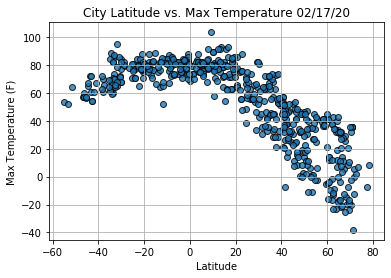

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

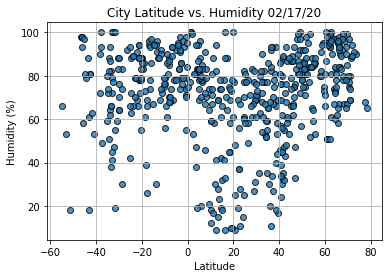

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

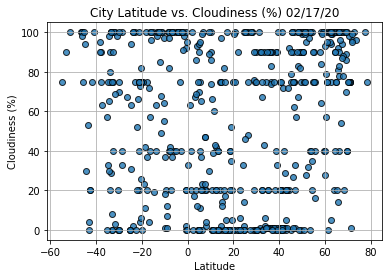

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

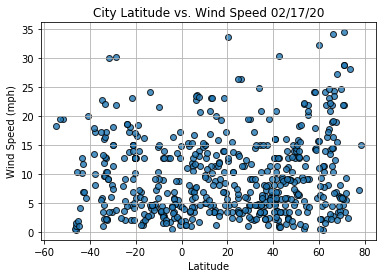

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import matplotlib
import matplotlib.pyplot as plt

In [96]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    plt.title(title)
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [97]:
index13 = city_data_df.loc[13]
index13

City                         Pout
Country                        SN
Date          2020-02-17 21:15:27
Lat                         14.77
Lng                        -17.06
Max Temp                     82.4
Humidity                       42
Cloudiness                     97
Wind Speed                  11.41
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2020-02-17 21:12:44,62.46,-114.35,-13.00,61,5,10.29
2,Calamar,CO,2020-02-17 21:15:24,10.25,-74.91,89.60,59,90,14.99
3,Katsuura,JP,2020-02-17 21:15:24,35.13,140.30,44.01,65,20,5.82
4,Korla,CN,2020-02-17 21:15:25,41.76,86.15,26.01,88,72,3.67
5,Albany,US,2020-02-17 21:13:26,42.60,-73.97,37.40,43,1,12.75
...,...,...,...,...,...,...,...,...,...
541,Katangli,RU,2020-02-17 21:17:32,51.71,143.23,-10.68,98,28,1.30
543,Lucea,JM,2020-02-17 21:17:32,18.45,-78.17,84.99,74,20,23.04
544,Usinsk,RU,2020-02-17 21:17:32,65.99,57.53,26.80,93,100,34.23
545,Hailar,CN,2020-02-17 21:17:32,49.20,119.70,-0.47,97,82,7.43


In [98]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

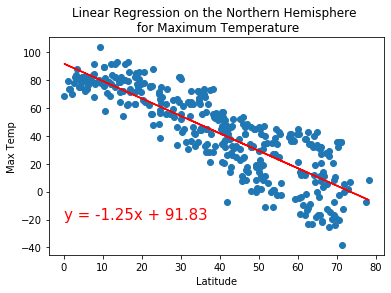

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0, -20))

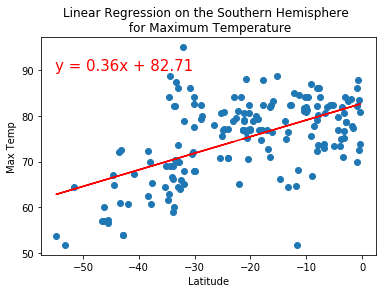

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))


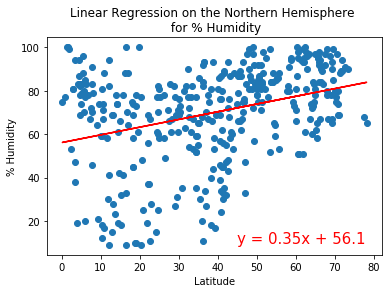

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

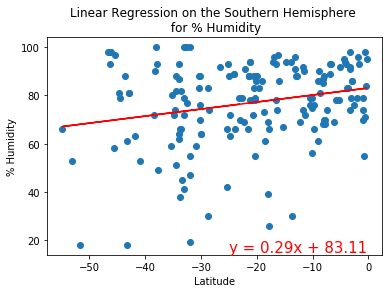

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

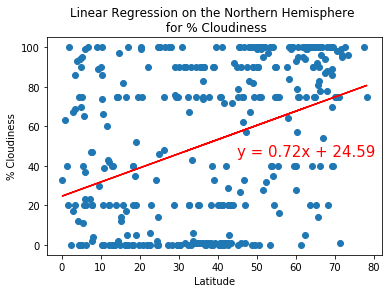

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,45))

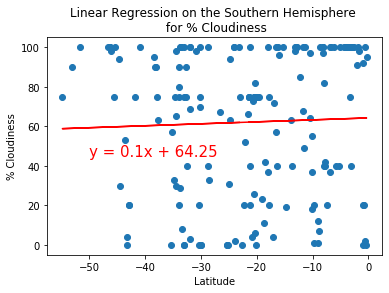

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,45))

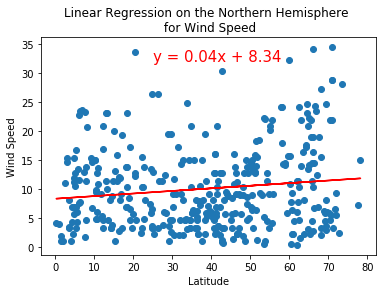

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(25,32))

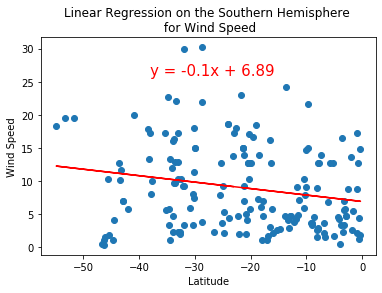

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-38,26))